In [339]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [340]:
df=pd.read_csv("data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [341]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [344]:
df['price']     = df['price'].astype('int64')
df['bedrooms']  = df['bedrooms'].astype('int64')
df['bathrooms'] = df['bathrooms'].astype('int64')
df['floors']    = df['floors'].astype('int64')
df['street']    = df['street'].astype('string')
df['city']      = df['city'].astype('string')
df['statezip']  = df['statezip'].astype('string')
df['country']   = df['country'].astype('string')

In [346]:
df.drop_duplicates()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [347]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [348]:
df.shape

(4600, 18)

In [349]:
(df.price == 0).sum()


49

In [350]:
df['price'].replace(0, np.nan, inplace = True)
df.dropna(inplace=True)
(df.price == 0).sum()
df.shape

(4551, 18)

In [351]:
df['date'] = pd.to_datetime(df['date'])

In [352]:
df.insert(1, "year", df.date.dt.year)
df.head()

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,2014,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,2014,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [353]:
df.nunique(axis = 0)  


date               70
year                1
price            1740
bedrooms           10
bathrooms           8
sqft_living       561
sqft_lot         3087
floors              3
waterfront          2
view                5
condition           5
sqft_above        510
sqft_basement     207
yr_built          115
yr_renovated       59
street           4476
city               44
statezip           77
country             1
dtype: int64

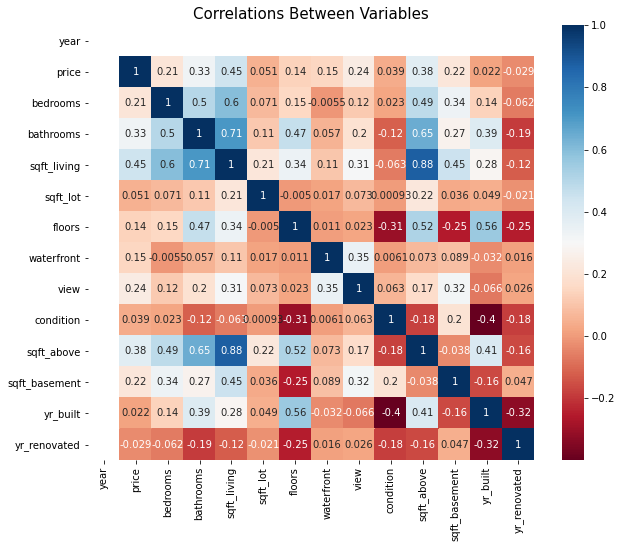

In [354]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu",annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show()

In [355]:
#if there is so many feature use the most corr of them  like  >0.5 or <.-50

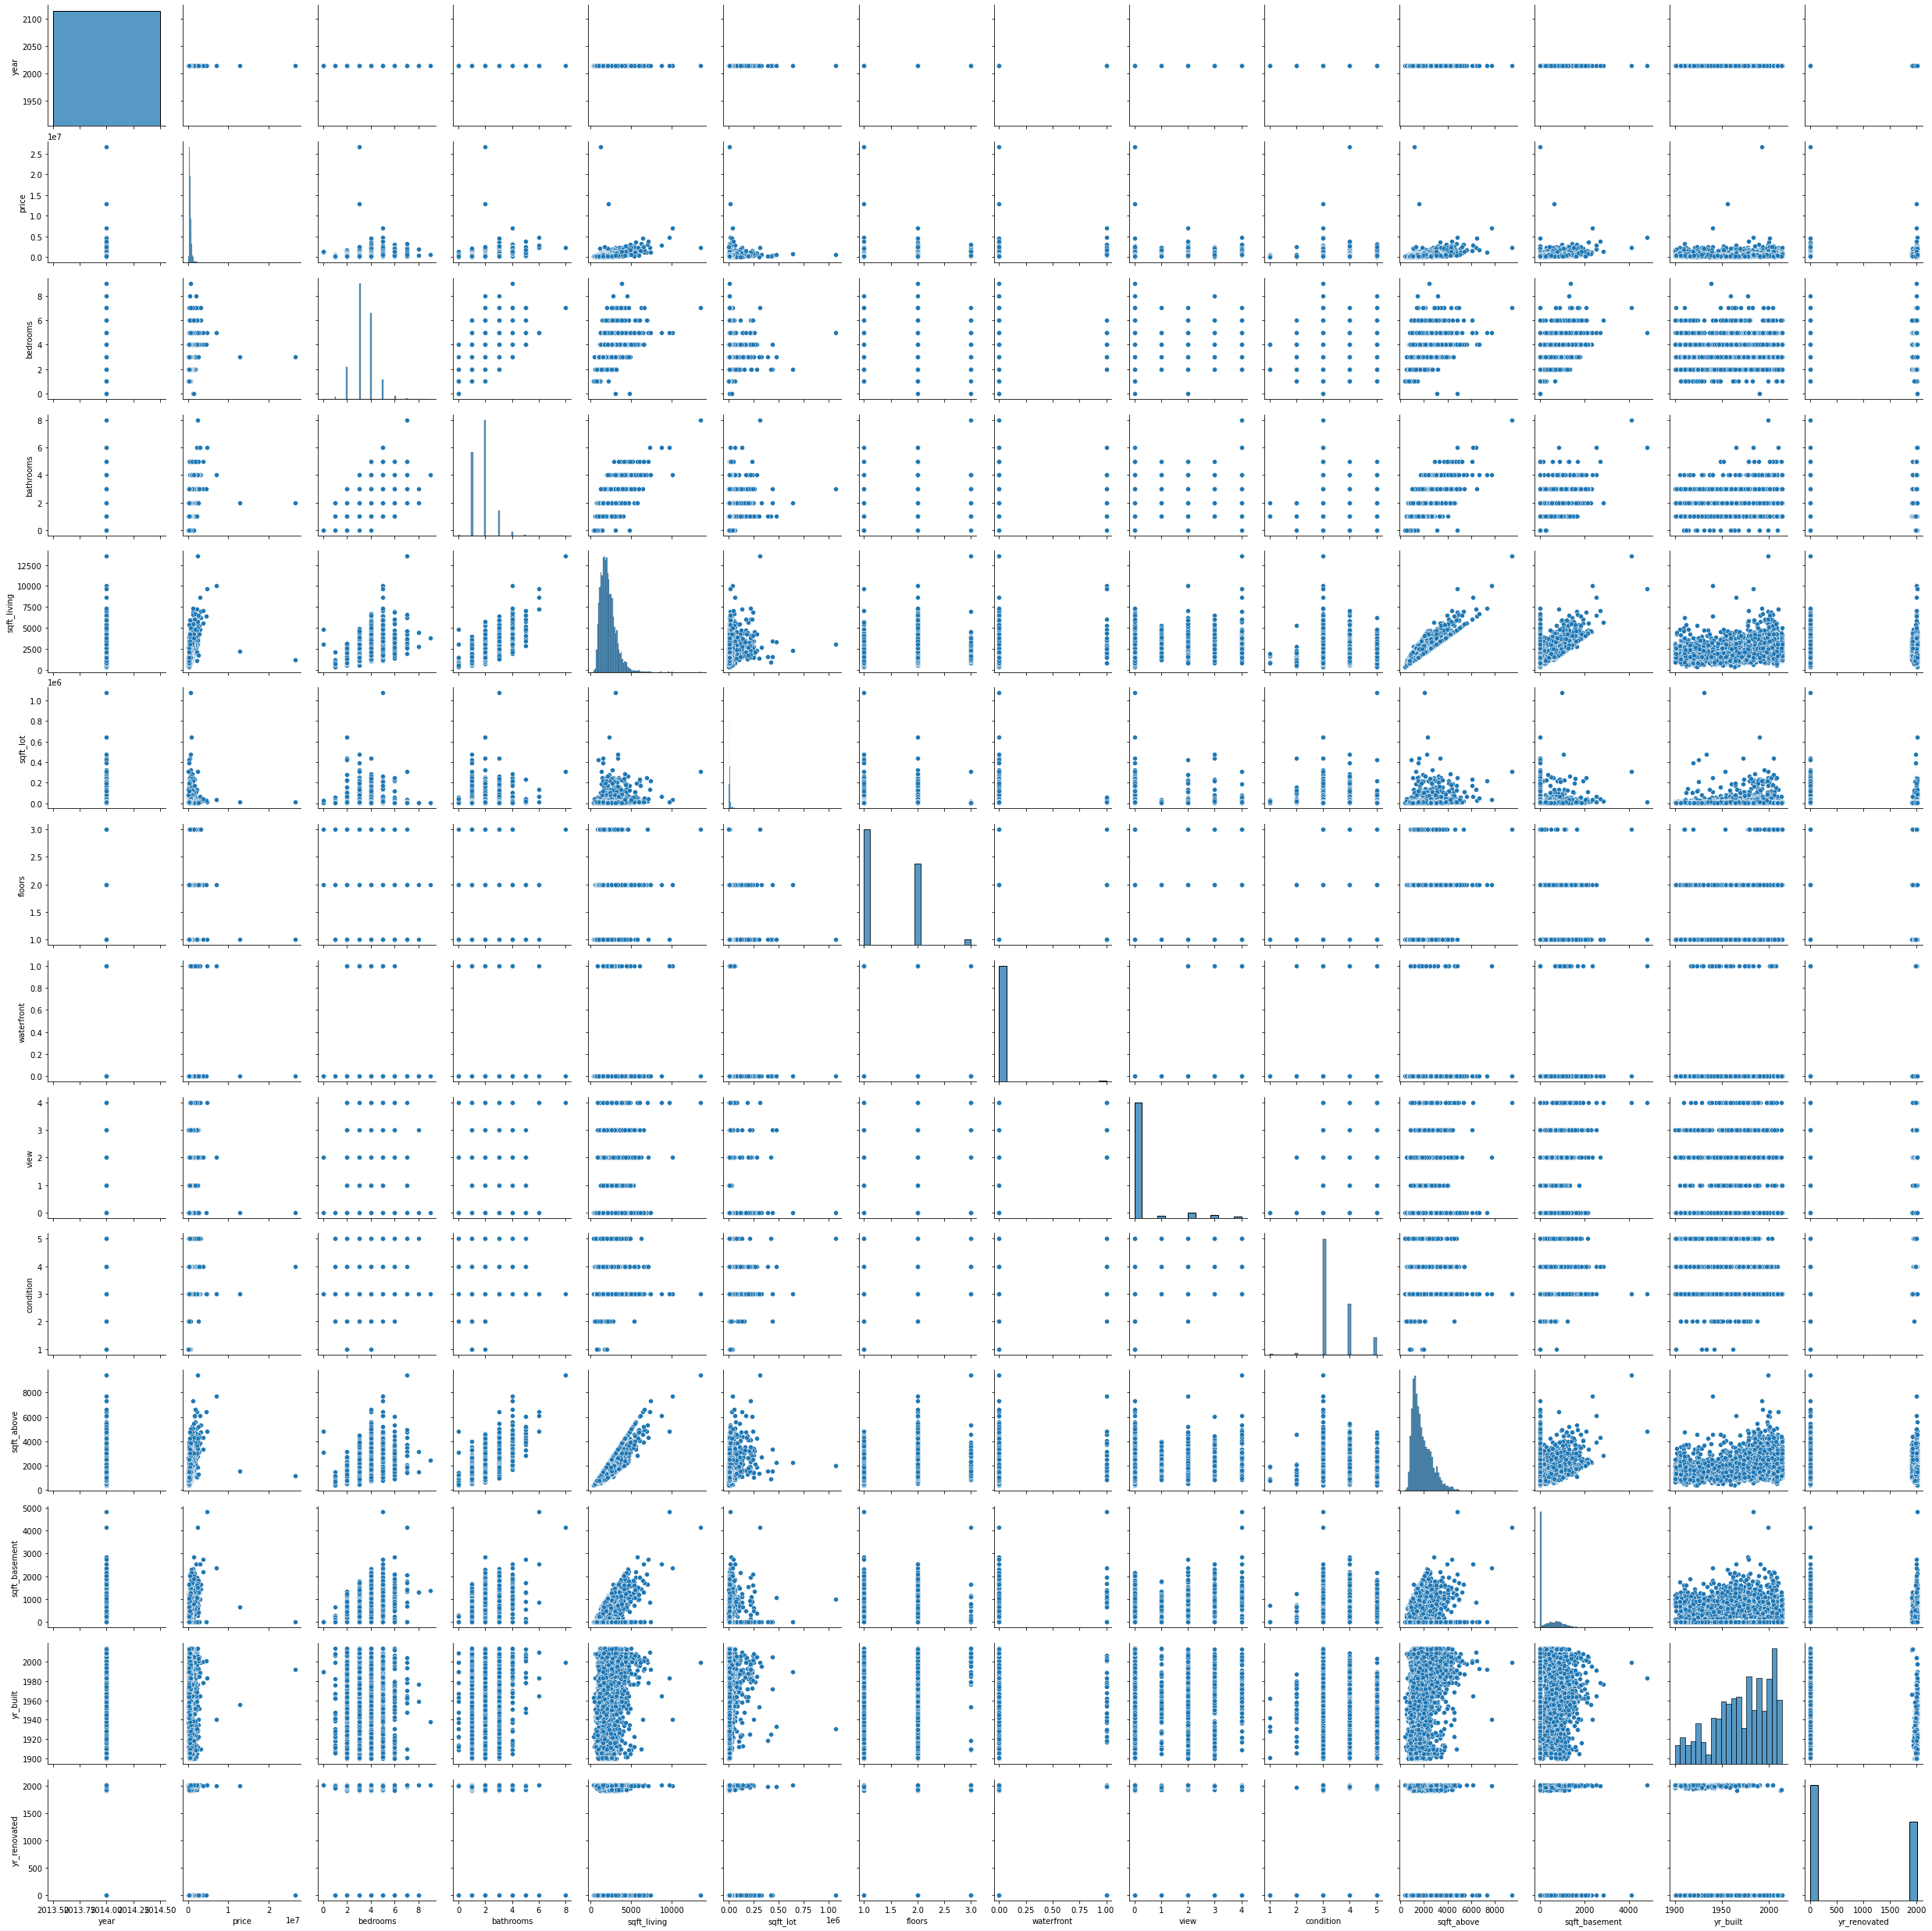

In [356]:
sns.pairplot(df)

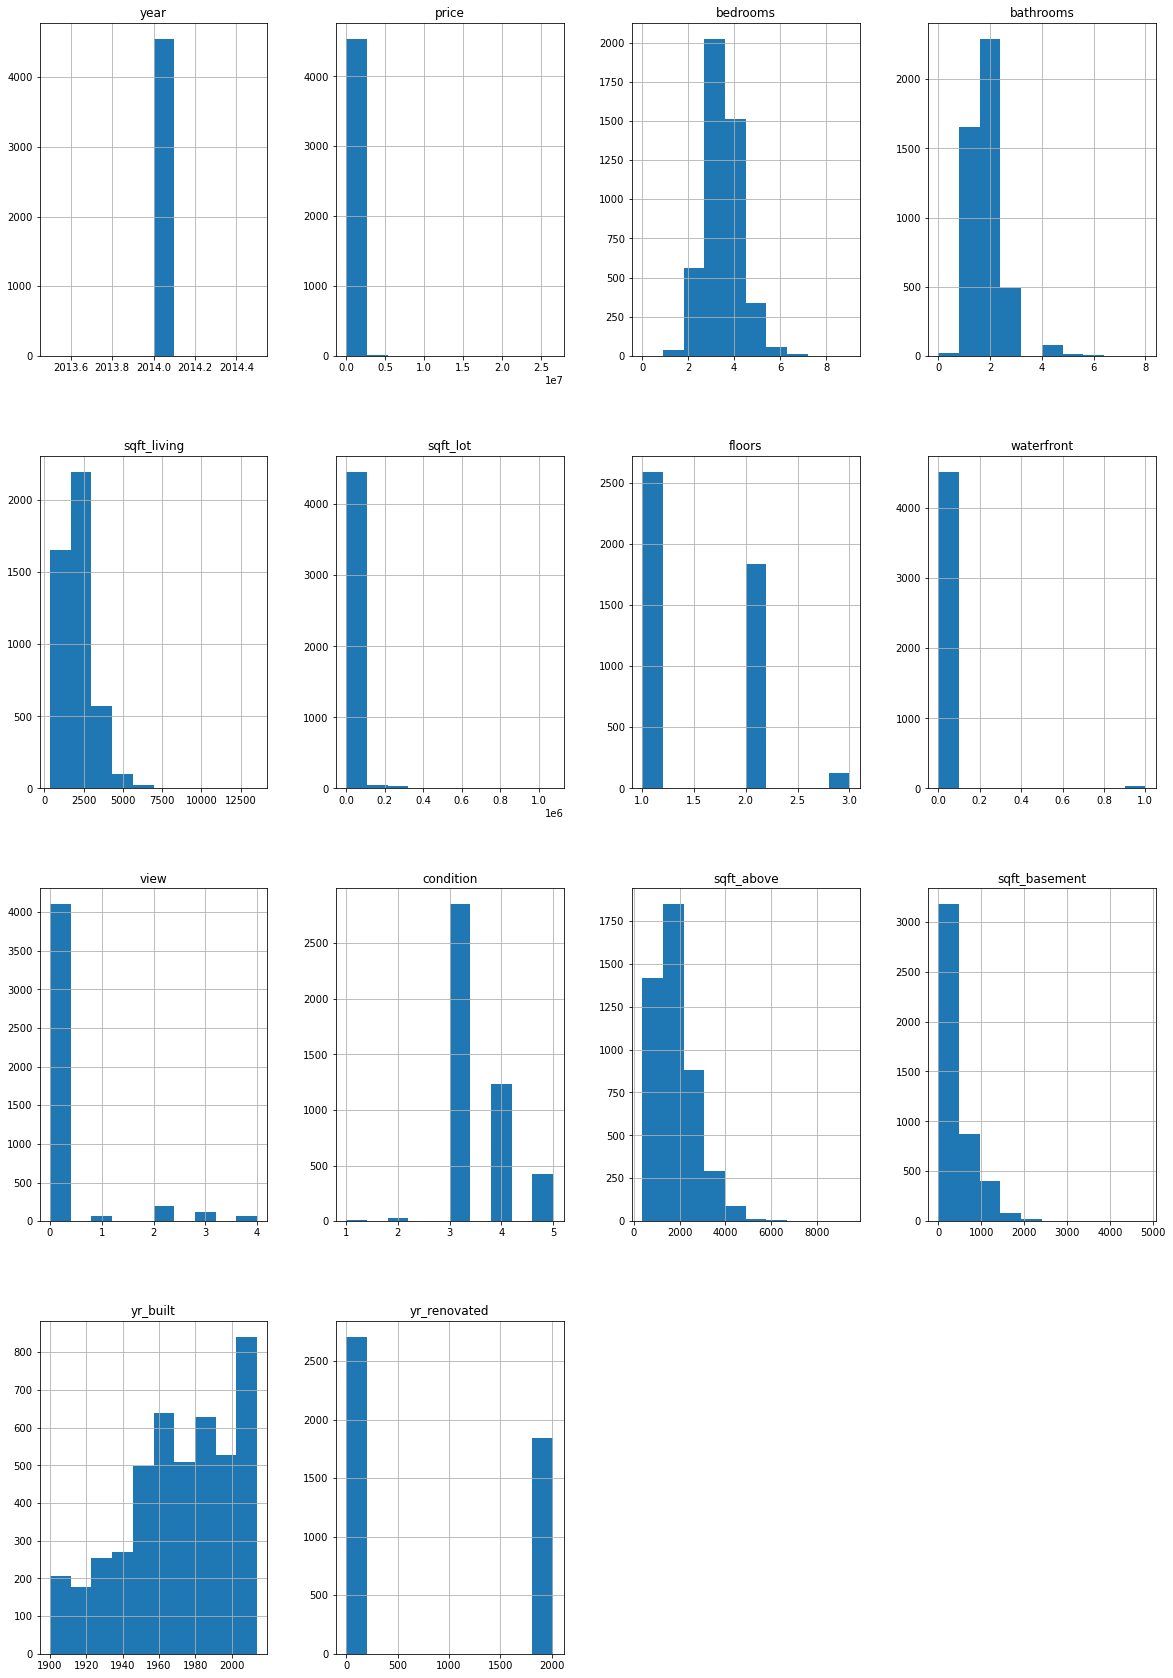

In [357]:
df.hist(figsize=(20,30));


In [358]:
df["country"].value_counts()

USA    4551
Name: country, dtype: Int64

In [359]:
d = pd.get_dummies(df, columns=['city'], prefix = ['city'])
d = d.drop(['date', 'street', 'statezip', 'country','sqft_above'], axis = 1)

In [360]:
columns = d.columns

In [361]:
scaler =MinMaxScaler(feature_range = (0, 1))
normal = pd.DataFrame(scaler.fit_transform(d), columns = columns)
normal.head(20)

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,0.0,0.011481,0.333333,0.125,0.073652,0.006775,0.0,0.0,0.0,0.50,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.089391,0.555556,0.250,0.249051,0.007835,0.5,0.0,1.0,1.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.012572,0.333333,0.250,0.118451,0.010534,0.0,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.015507,0.333333,0.250,0.123766,0.006885,0.0,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.020397,0.444444,0.250,0.119210,0.009186,0.0,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.018140,0.222222,0.125,0.038724,0.005348,0.0,0.0,0.0,0.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.012309,0.222222,0.250,0.074412,0.001790,0.0,0.0,0.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.017839,0.444444,0.250,0.177677,0.032815,0.5,0.0,0.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.016729,0.333333,0.250,0.156416,0.081771,0.0,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.023783,0.444444,0.250,0.087320,0.005181,0.0,0.0,0.0,0.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [362]:
x = normal.drop("price", axis=1)
y = pd.DataFrame(normal["price"])

In [363]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state =43 )

In [364]:
model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
model.intercept_

array([-1.05436978e+10])

In [365]:
model.coef_


array([[ 2.10062640e-18, -1.25314494e-02,  1.82230171e-02,
         1.19542421e-01, -1.18141042e-02, -2.26128058e-03,
         1.35732187e-02,  1.00727427e-02,  6.89874379e-03,
        -1.96176966e-02, -1.73441810e-03,  2.21984667e-04,
         1.05436978e+10,  1.05436978e+10,  1.05436978e+10,
         1.05436978e+10,  1.05436978e+10,  1.05436978e+10,
         1.05436978e+10,  1.05436978e+10,  1.05436978e+10,
         1.05436978e+10,  1.05436978e+10,  1.05436978e+10,
         1.05436978e+10,  1.05436978e+10,  1.05436978e+10,
         1.05436978e+10,  1.05436978e+10,  1.05436978e+10,
         1.05436978e+10,  1.05436978e+10,  1.05436978e+10,
         1.05436978e+10,  1.05436978e+10,  1.05436978e+10,
         1.05436978e+10,  1.05436978e+10,  1.05436978e+10,
         1.05436978e+10,  1.05436978e+10,  1.05436978e+10,
         1.05436978e+10,  1.05436978e+10,  1.05436978e+10,
         1.05436978e+10,  1.05436978e+10,  1.05436978e+10,
         1.05436978e+10,  1.05436978e+10,  1.05436978e+1

In [366]:
# MAE
print("Mean Absolute Error     : ", metrics.mean_absolute_error(Y_test, Y_pred))

# MSE
print("Mean Squared Error      : ", metrics.mean_squared_error(Y_test, Y_pred))

# RMSE
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

#R2 Score
print("R2 Score                : ", metrics.r2_score(Y_test, Y_pred))



Mean Absolute Error     :  0.004787673789393315
Mean Squared Error      :  7.836792324686422e-05
Root Mean Squared Error :  0.008852565913161236
R2 Score                :  0.665089099322583


In [367]:
r_squared = model.score(X_train, Y_train )
r_squared

0.24280894194853886